# Introduction to scikit-learn (sklearn)  
this notebook demostrates the some of the most useful functions of the beautiful scikit learn library 
what we're going to cover
1. an end-to-end scikit-learn workflow
2. getting the data ready
3. choose the right estimator/algorith for our problems
4. fit the model and use it to make pridictions on our data
5. evaluating a model
6. improve a model
7. save and load a trained model
8. put it all together

## 1. an end-to-end scikit-learn workflow

In [1]:
what_were_covering = ['1. an end-to-end scikit-learn workflow',
'2. getting the data ready',
'3. choose the right estimator/algorith for our problems',
'4. fit the model and use it to make pridictions on our data',
'5. evaluating a model',
'6. improve a model',
'7. save and load a trained model',
'8. put it all together']

In [2]:
# getting the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_diesease  = pd.read_csv("./data/heart-disease.csv")
heart_diesease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (features matrix)
X = heart_diesease.drop("target", axis=1)

# create Y (labels matrix)
Y = heart_diesease["target"]

In [4]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# we'll keep the default hyperparameter 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
clf.fit(X_train, Y_train);

In [7]:
# make a prediction
# y_label = clf.predict(np.array([0,2,3,4]))
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [8]:
Y_test.head(11)

19     1
7      1
158    1
55     1
256    0
122    1
149    1
232    0
231    0
171    0
82     1
Name: target, dtype: int64

In [9]:
# 4. evaluate the model on the trainding data and test data
clf.score(X_train, Y_train)

1.0

In [10]:
clf.score(X_test,Y_test)

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [13]:
confusion_matrix(Y_test, y_preds)

array([[24,  6],
       [ 6, 25]], dtype=int64)

In [14]:
accuracy_score(Y_test, y_preds)

0.8032786885245902

In [15]:
# 5. improve a model 
# Try differen amt of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set {clf.score(X_test, Y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set 78.69%

Trying model with 20 estimators..
Model accuracy on test set 83.61%

Trying model with 30 estimators..
Model accuracy on test set 80.33%

Trying model with 40 estimators..
Model accuracy on test set 85.25%

Trying model with 50 estimators..
Model accuracy on test set 80.33%

Trying model with 60 estimators..
Model accuracy on test set 78.69%

Trying model with 70 estimators..
Model accuracy on test set 81.97%

Trying model with 80 estimators..
Model accuracy on test set 83.61%

Trying model with 90 estimators..
Model accuracy on test set 83.61%



In [16]:
# 6. save a model and load
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
# load a model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8360655737704918

## 2. getting the data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (usually 'X' and 'Y')
2. filling (also called imputing) Or disregarding missing values
3. converting non-numerical vals to numerical vals (also called feature encoding)

In [18]:
X = heart_diesease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y = heart_diesease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
X_train.shape

(242, 13)

### 1.1 make sure its all numerical first

In [22]:
car_sales = pd.read_csv("./data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
X = car_sales.drop("Price", axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [26]:
Y = car_sales["Price"]
Y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(X_test, Y_test)

In [29]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catigorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", one_hot, catigorical_features)], remainder="passthrough")

Tranformed_X = transformer.fit_transform(X)
Tranformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(Tranformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
dummies = pd.get_dummies(car_sales[["Make", "Doors", "Colour"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [33]:
# lets fit the model
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(Tranformed_X,Y,test_size=0.2)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.3235867221569877

### 1.2 what if we have missing values?
1. fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [34]:
carMissing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
carMissing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [35]:
carMissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
X = carMissing.drop("Price", axis=1)
Y = carMissing["Price"]

In [37]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catigorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", one_hot, catigorical_features)], remainder="passthrough")

Tranformed_X = transformer.fit_transform(X)
Tranformed_X

# used to give errors when data used to have NaNs

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### option 1 : fill missing data with pandas

In [38]:
#  fill the 'make' column
carMissing['Make'].fillna("missing", inplace=True)

# fill the 'colour' column
carMissing['Colour'].fillna("missing", inplace=True)

# fill the 'Odometer (KM)' column
carMissing["Odometer (KM)"].fillna(carMissing["Odometer (KM)"].mean(), inplace=True)

# fill the 'Doors' column
carMissing["Doors"].fillna(4, inplace=True)

C:\Users\Vaibhav Saini\AppData\Local\Temp\ipykernel_20512\2015391120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carMissing['Make'].fillna("missing", inplace=True)
C:\Users\Vaibhav Saini\AppData\Local\Temp\ipykernel_20512\2015391120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [39]:
# check our dataframe again
carMissing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# remove rows with missing price value
carMissing.dropna(inplace=True)

In [41]:
X = carMissing.drop("Price", axis=1)
Y = carMissing["Price"]

In [42]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catigorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", one_hot, catigorical_features)], remainder="passthrough")

Tranformed_X = transformer.fit_transform(carMissing)
Tranformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2 : fill missing values with skikit-learn

In [43]:
carMissing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
carMissing.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0


In [44]:
carMissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Drop the rows with no labels
carMissing.dropna(subset=["Price"], inplace=True)
carMissing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
# Split into X and Y
X = carMissing.drop("Price", axis=1)
Y = carMissing["Price"]

In [47]:
# fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill catogorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# transform the X
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [48]:
carMissingFilled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [49]:
carMissingFilled.head(10)

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
5,Honda,Red,4.0,42652.0
6,Toyota,Blue,4.0,163453.0
7,Honda,White,4.0,130987.447894
8,missing,White,4.0,130538.0
9,Honda,Blue,4.0,51029.0


In [50]:
carMissingFilled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
onehot = OneHotEncoder()
transformer = ColumnTransformer([("onehot", onehot, cat_features)], remainder="passthrough")

transfromed_X = transformer.fit_transform(carMissingFilled) 
transfromed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
# Now we got model as Numbers and no missing Value
# Lets fit a model
np.random.seed(69)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transfromed_X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.25364946840137126

In [53]:
what_were_covering

['1. an end-to-end scikit-learn workflow',
 '2. getting the data ready',
 '3. choose the right estimator/algorith for our problems',
 '4. fit the model and use it to make pridictions on our data',
 '5. evaluating a model',
 '6. improve a model',
 '7. save and load a trained model',
 '8. put it all together']

## 3. choosing the rignt model for our problem
some things to note:
* sklearn refers to machine learning models, algorithms as estimators
* classification problems - pridicting a categary (heart disease or Not)
    * sometimes you'll see `clf` (short for classifier) used as classification estimator
* regression problem - predicting a number (seeling price of a car)

If you are working on a ML problem and not sure on what model to use, please refer to this map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 picking a ml model for regression model 

let's use the california housing dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html 

In [54]:
# get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [55]:
housingDf = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housingDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [56]:
housingDf["MedHouseVal"] = housing["target"]
housingDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [57]:
housingDf["target"] = housing["target"]

In [58]:
housingDf = housingDf.drop("MedHouseVal", axis = 1)

In [59]:
housingDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [60]:
# Import algo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(69)

# create the data
X = housingDf.drop("target", axis=1)
Y = housingDf["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.606053724173707

what if `Ridge` didn't work or the score didn't fit our needs?

well, we could always try a diffrent model...

How about we try an ensemble method (An ensemble is a smaller model that is used to try and make better predictions than just a single model.)

sklearn's essemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [61]:
# import the RandomForestRegressor model class from the esemble model
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(69)

X = housingDf.drop("target", axis=1)
Y = housingDf["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.8081169165695959

## 2.2 Picking a machine learing model for a classification problem 

lets go to the map........... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [62]:
heartDisease = pd.read_csv("./data/heart-disease.csv")

In [63]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [64]:
from sklearn.svm import LinearSVC

# set up random seed 
np.random.seed(42)

# make the data
X=heartDisease.drop("target", axis=1)
Y=heartDisease["target"]

# split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC(max_iter=100)
clf.fit(X_train, Y_train)

# evaluate the LinearSVC
clf.score(X_test,Y_test)


C:\Users\Vaibhav Saini\OneDrive\Desktop\projects\ml\SP_2\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Vaibhav Saini\OneDrive\Desktop\projects\ml\SP_2\env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.47540983606557374

In [65]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heartDisease.drop("target", axis=1)
Y=heartDisease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8524590163934426

Titbit:

If u have stuctured data use ensemble methods

If u have unstructuresd data , use deep learning or transfer learning

In [66]:
what_were_covering

['1. an end-to-end scikit-learn workflow',
 '2. getting the data ready',
 '3. choose the right estimator/algorith for our problems',
 '4. fit the model and use it to make pridictions on our data',
 '5. evaluating a model',
 '6. improve a model',
 '7. save and load a trained model',
 '8. put it all together']

## 4. fit the model and make pridictions

### 4.1 fit the model

different names for:
* `X` = features, data, features variables
* `Y` = labels, targets, target variables

In [67]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heartDisease.drop("target", axis=1)
Y=heartDisease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8524590163934426

### 4.2 MAKE PREDICTIONS USING A MACHINE LEARNING MODEL
two ways to make predictions :
1. `predict()`
2.  `predict_probs()`

In [68]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
# make 

Y_pred = clf.predict(X_test)
np.mean(Y_pred == np.array(Y_test))

0.8524590163934426

In [71]:
clf.score(X_test, Y_test)

0.8524590163934426

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8524590163934426

make predictions with `predict_proba()`

In [73]:
#predict_provba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

`predict()` can be used fro regression models

In [74]:
housingDf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [75]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housingDf.drop("target", axis=1)
Y=housingDf["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf=RandomForestRegressor()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8065734772187598

In [76]:
Y_pred = clf.predict(X_test)

In [77]:
housingDf.loc[20046]

MedInc           1.681200
HouseAge        25.000000
AveRooms         4.192201
AveBedrms        1.022284
Population    1392.000000
AveOccup         3.877437
Latitude        36.060000
Longitude     -119.010000
target           0.477000
Name: 20046, dtype: float64

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_pred)

0.32659871732073664

## 4 Evaluatng a machine learning model
three ways to evaluate scikit learn model/estimators
1. estimator's built-in scores() method
2. the scoring parameter
3. problem specific metric functions

### 4.1 Evaluting a model with the `Score` method

In [79]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heartDisease.drop("target", axis=1)
Y=heartDisease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8524590163934426

In [80]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housingDf.drop("target", axis=1)
Y=housingDf["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf=RandomForestRegressor()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8065734772187598

### 4.2 Evaluting a model with the `Scoring` method

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X=heartDisease.drop("target", axis=1)
Y=heartDisease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8524590163934426

In [82]:
cross_val_score(clf, X, Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [83]:
cross_val_score(clf, X, Y, cv=20)

array([0.9375    , 0.875     , 0.8125    , 0.73333333, 0.8       ,
       0.86666667, 0.86666667, 1.        , 0.86666667, 0.86666667,
       0.86666667, 0.86666667, 0.8       , 0.66666667, 0.8       ,
       0.86666667, 0.66666667, 0.8       , 0.86666667, 0.8       ])

In [84]:
np.random.seed(42)
normal_score=clf.score(X_test, Y_test)
five_CV=np.mean(cross_val_score(clf,X,Y))

In [85]:
normal_score, five_CV

(0.8524590163934426, 0.8248087431693989)

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(69)
X=heartDisease.drop("target", axis=1)
Y=heartDisease["target"]
clf=RandomForestClassifier()
np.mean(cross_val_score(clf, X, Y))

0.8249180327868852

In [87]:
print(f"heart classifier accuracy {np.mean(cross_val_score(clf,X,Y))*100:.2f}%")

heart classifier accuracy 82.83%


**Area under the recevier operating characterstics curve (AUC/ROC)**

Roc curves are comparision of model's true positive rate (tpr) versus a models false positive rate (fpr) 
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 1 when truth is 0

In [88]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [89]:
from sklearn.metrics import roc_curve
clf.fit(X_train,Y_train)
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.69, 0.31],
       [0.67, 0.33],
       [0.06, 0.94],
       [0.79, 0.21],
       [0.38, 0.62],
       [0.18, 0.82],
       [0.89, 0.11],
       [0.17, 0.83],
       [0.4 , 0.6 ],
       [0.19, 0.81]])

In [90]:
y_probs_positive = y_probs[:,1]

In [91]:
y_probs_positive

array([0.31, 0.33, 0.94, 0.21, 0.62, 0.82, 0.11, 0.83, 0.6 , 0.81, 0.69,
       0.19, 0.88, 0.05, 0.26, 0.71, 0.76, 0.09, 0.69, 0.31, 0.85, 0.68,
       0.94, 0.33, 0.44, 0.53, 0.87, 0.7 , 0.85, 0.85, 0.05, 0.61, 0.85,
       0.61, 0.64, 0.39, 0.2 , 0.73, 0.54, 0.87, 0.42, 0.36, 0.56, 0.96,
       0.26, 0.49, 0.33, 0.55, 0.61, 0.83, 0.  , 0.85, 0.56, 0.92, 0.48,
       0.08, 0.65, 0.62, 0.38, 0.99, 0.92])

In [92]:
fpr, tpr, threshold = roc_curve(Y_test, y_probs_positive)

In [93]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0952381 ,
       0.0952381 , 0.0952381 , 0.14285714, 0.14285714, 0.19047619,
       0.23809524, 0.23809524, 0.28571429, 0.28571429, 0.38095238,
       0.38095238, 0.42857143, 0.42857143, 0.47619048, 0.57142857,
       0.57142857, 0.85714286, 0.95238095, 1.        ])

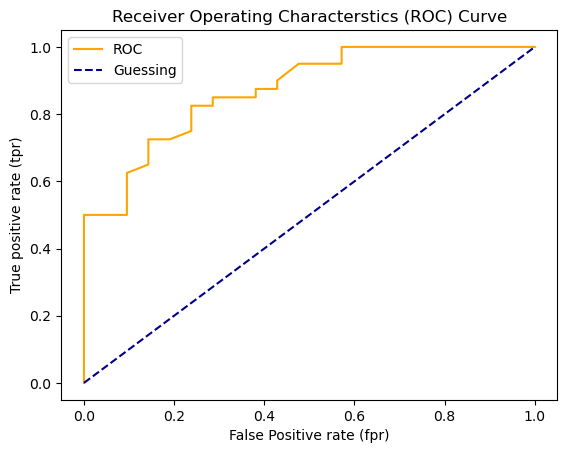

In [94]:
import matplotlib.pyplot as plt

def plot_roc(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) 
    and true positive rate (tpr) of a model
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characterstics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc(fpr,tpr)

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_probs_positive)

0.8726190476190476

**confusion matrix**

in essenense, giving you an idea of where the model is getting confused

In [96]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(Y_test, y_preds)

array([[16,  5],
       [ 7, 33]], dtype=int64)

In [97]:
pd.crosstab(Y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,16,5
1,7,33


In [98]:
import sys
!conda install --yes --prefix "{sys.prefix}" seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Vaibhav Saini\OneDrive\Desktop\projects\ml\SP_2\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       haa95532_0         128 KB
    ------------------------------------------------------------
                                           Total:         128 KB

The following packages will be UPDATED:

  ca-certificates                      2024.3.11-haa95532_0 --> 2024.7.2-haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


<Axes: >

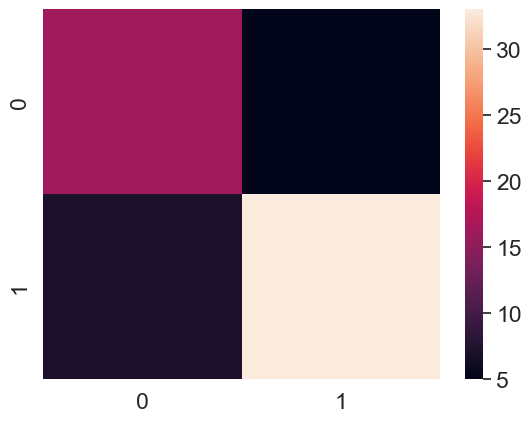

In [99]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(Y_test,y_preds)
sns.heatmap(conf_mat)

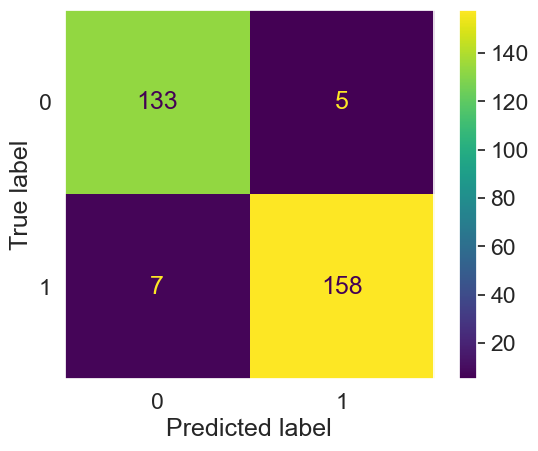

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=Y)
plt.grid(False)

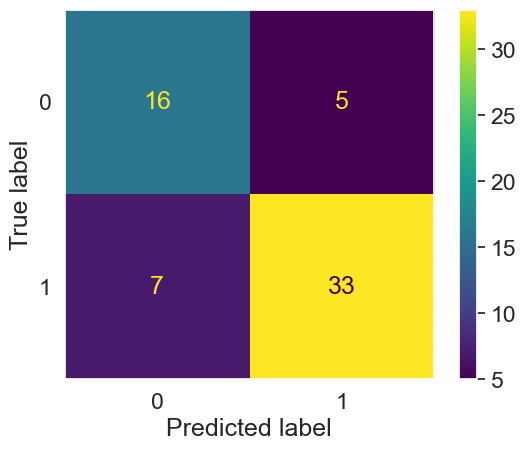

In [101]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test,y_pred=y_preds)
plt.grid(False)

### classification report

In [102]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.87      0.82      0.85        40

    accuracy                           0.80        61
   macro avg       0.78      0.79      0.79        61
weighted avg       0.81      0.80      0.81        61



In [103]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1
disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Vaibhav Saini\OneDrive\Desktop\projects\ml\SP_2\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vaibhav Saini\OneDrive\Desktop\projects\ml\SP_2\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vaibhav Saini\OneDrive\Desktop\projects\ml\SP_2\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [104]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housingDf.drop("target", axis=1)
Y = housingDf["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [105]:
model.score(X_test, Y_test)

0.8065734772187598

In [106]:
from sklearn.metrics import r2_score
Y_test_mean = np.full(len(Y_test), Y_test.mean())
Y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [107]:
r2_score(y_true=Y_test, y_pred=Y_test_mean)

0.0

In [108]:
r2_score(y_true=Y_test, y_pred=Y_test)

1.0

**mean absolute error** 

MAE is the average of the absolute diffrence between predictions and actual values

It gives you an idea about how wrong your model prediction are.

In [109]:
#MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_preds)
mae

0.32659871732073664

In [110]:
df = pd.DataFrame(data={"actual values" : Y_test, 
                        "predicted values" : y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [111]:
np.abs(df).mean()

actual values       2.055003
predicted values    2.067051
differences         0.326599
dtype: float64

In [112]:
# MSE 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_preds)
mse

0.2534678520824551

In [113]:
np.square(df["differences"]).mean()

0.2534678520824551

In [114]:
df["squared"] = np.square(df["differences"])

In [115]:
df.head(10)

,actual values,predicted values,differences,squared
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


***4.2.3 Finally using the `scoring` parameter***

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heartDisease.drop("target", axis=1)
Y=heartDisease["target"]
clf=RandomForestClassifier()

In [117]:
np.random.seed(42)
#cross validation accuracy
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring=None) 
# if scoring=none then defualt scoring method is used(accuracy for classification, r2 for regression)

In [118]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [119]:
np.mean(cv_acc)*100

82.48087431693989

In [120]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,Y,cv=5, scoring="precision")

In [121]:
cv_acc

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [122]:
np.mean(cv_acc)*100

83.29547346025925

In [123]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,Y,cv=5, scoring="recall")
cv_acc

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [124]:
np.mean(cv_acc)*100

85.45454545454545

lets see the `scoring` parameter being used for a regression

In [125]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [126]:
X = housingDf.drop("target", axis=1)
Y = housingDf["target"]

In [127]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [128]:
np.random.seed(42)
cv_r2 = cross_val_score(clf, X, Y, cv=5, scoring=None)

In [129]:
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [130]:
np.mean(cv_acc)*100

85.45454545454545

In [131]:
# mean absolue error
cv_mae = cross_val_score(clf, X, Y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4795634981879846

In [132]:
# mean squared error
cv_mse = cross_val_score(clf, X, Y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46251249505519193

## 4.3 using different evaluation metrics as sckit-learn functions

the 3rd way to evalueate sckit-learn machine learning models/estimators is to use the `sklearn.metrics` module - https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [134]:
np.random.seed(42)
x=heart_diesease.drop("target", axis=1)
y=heart_diesease["target"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_preds = clf.predict(X_test)
print("classification metrics")
print(f"accuracy : {accuracy_score(Y_test,y_preds)*100:2f}")
print(f"precision : {precision_score(Y_test,y_preds)*100:2f}")
print(f"recall : {recall_score(Y_test,y_preds)*100:2f}")
print(f"f1 : {f1_score(Y_test,y_preds)*100:2f}")

classification metrics
accuracy : 85.245902
precision : 84.848485
recall : 87.500000
f1 : 86.153846


In [135]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [136]:
np.random.seed(42)
x = housingDf.drop("target", axis=1)
y = housingDf["target"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)
y_preds = clf.predict(X_test)
print("regression metrics")
print(f"r2 : {r2_score(Y_test,y_preds)*100:2f}")
print(f"MAE : {mean_absolute_error(Y_test,y_preds)}")
print(f"MSE : {mean_squared_error(Y_test,y_preds)}")

regression metrics
r2 : 80.657348
MAE : 0.32659871732073664
MSE : 0.2534678520824551


## 5 improving a model

First prediction = baseline predictions.  
First model = baseline model.  
  
**from a data perspective:**
* could we collect more data? (generally, the more data, the better)
* could we improve our data?



**from a model perspective**
* is there a better model we could use?
* could we improve the current model?  

**hyperparameters vs parameters**
* parameters = model finde these patterns in data  
* hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust hyperparameters:**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [137]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [138]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyperparameters by hand

let's make 3 sets training, validation and test

In [139]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're aer going to adjust the following
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [140]:
def evaluate_preds(y_true, y_preds):
    """

    Performs evaluation comparision between y_preds labels and y_test labels on a classification

    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"accuracy : {accuracy*100:2f}%")
    print(f"precision : {precision*100:2f}%")
    print(f"recall : {recall*100:2f}%")
    print(f"f1 : {f1*100:2f}%")

    return metric_dict

In [141]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#Shuffle the data
heart_diesease_shuffled = heart_diesease.sample(frac=1)
X=heart_diesease_shuffled.drop("target", axis=1)
Y=heart_diesease_shuffled["target"]

# split the data into training validation and test sets
train_split = round(0.7 * len(heart_diesease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_diesease_shuffled))
X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Make Baseline predictions
Y_preds = clf.predict(X_valid)

len(X_valid), len(Y_valid)
# len(X_test), len(Y_test)
# Evaluate the classifier on validation test
baseline_metrics = evaluate_preds(y_true=Y_valid, y_preds=Y_preds)
# baseline_metrics

accuracy : 82.222222%
precision : 81.481481%
recall : 88.000000%
f1 : 84.615385%


In [142]:
np.random.seed(42)
clf_2 = RandomForestClassifier(max_depth=50)
clf_2.fit(X_train, Y_train)

# Make Baseline predictions
Y_preds_2 = clf_2.predict(X_valid)

# len(X_test), len(Y_test)
# Evaluate the classifier on validation test
baseline_metrics_2 = evaluate_preds(y_true=Y_valid, y_preds=Y_preds_2)
baseline_metrics

accuracy : 82.222222%
precision : 84.000000%
recall : 84.000000%
f1 : 84.000000%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 hyperparameter tuning with RandomizedSearchCV 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    "max_depth":[None, 5, 10, 20, 30],
    "max_features":["auto", "sqrt"],
    "min_samples_leaf":[2,4,6],
    "min_samples_split":[1,2,4],
    "n_estimators" :[10,100,200,500,1000,1200],
}
np.random.seed(42)

X = heart_diesease_shuffled.drop("target", axis=1)
y = heart_diesease_shuffled["target"]

